# Naive Bayes Classifier
Neste notebook vamos testar a qualidade do algoritmo Naive Bayes para a classificação de nódulos

Vamos usar o <i><b>Bernoulli Naive Bayes</b></i> pois já tratamos os dados para estarem em formato binário e a classificação também é binária

In [1]:
from sklearn.naive_bayes import BernoulliNB
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('final_features.csv')

y = data["malignancy"]
X = data.drop(columns=['malignancy','case_id'])

## Hyperparameter Tuning
Vamos aplicar 10-fold para testar o nosso modelo com diferentes hiperparâmetros

No caso do Bernoulli Naive Bayes temos apenas a <i>suavização de Laplace</i> (atributo 'alpha') para variar pois é um algoritmo com poucos hiperparâmetros

In [2]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold


# binarize = None pois os nossos dados ja estao em binario
# fit_prior = True vai permitir o algoritmo aprender as probabilidades de cada classe a priori
model = BernoulliNB(binarize=None, fit_prior=True)

# cross-validation para testar os hiperparametros
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=405)


print("Teste com varios ranges, objetivo: saber qual o melhor")
# hiperparametros a testar
param_grid = {
    'alpha': [0.01, 0.05, 0.1, 0.5, 1.0, 5.0],
}


# definir o GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy')

# treinar o modelo
grid_search.fit(X, y)

# resultado
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_}")

Teste com varios ranges, objetivo: saber qual o melhor
Best Hyperparameters: {'alpha': 0.01}
Best CV Score: 0.807904998619166


## Após encontrar o melhor valor para os hiperparâmetros

Vamos então criar e treinar o nosso modelo final para a classificação

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       781
           1       0.72      0.81      0.76       495

    accuracy                           0.80      1276
   macro avg       0.79      0.80      0.80      1276
weighted avg       0.81      0.80      0.81      1276

Test Accuracy:  0.8040752351097179


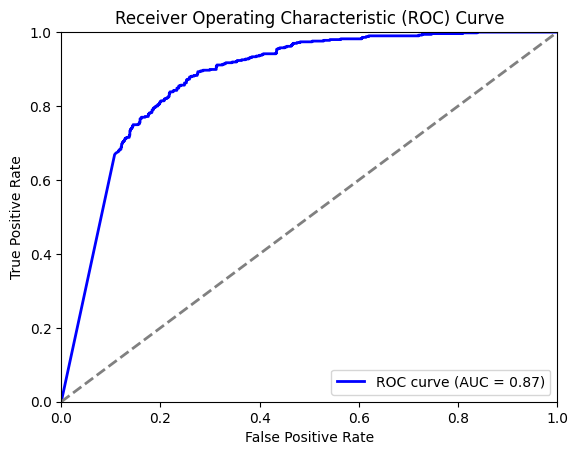

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc

# modelo
model = BernoulliNB(alpha=grid_search.best_params_["alpha"], binarize=None, fit_prior=True)

# dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=405)

# treinar o modelo
model.fit(X_train,y_train)

# classificacao de novos dados
y_pred = model.predict(X_test)

# avaliar modelo
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))



y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# plot da ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()